# Introduction to artificial neural network

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns
from sklearn.linear_model import Perceptron
from sklearn import datasets
import tensorflow as tf
from tensorflow import keras
print(keras.__version__), print(tf.__version__)

2.4.0
2.4.1


(None, None)

In [ ]:
fashion_data = keras.datasets.fashion_mnist
(X_train, y_train,),(X_test,y_test) = fashion_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


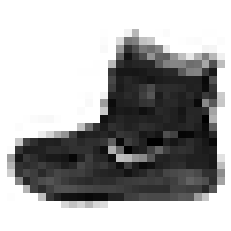

In [ ]:
X_test.shape,y_test.shape
plt.imshow(X_train[0],cmap=mpl.cm.binary)
plt.axis("off")
plt.savefig("shoe")

In [ ]:
!pip install seaborn_image


In [ ]:
# import seaborn_image as isns

# """Global settings for images"""
# isns.set_context("notebook")
# isns.set_image(cmap="deep", despine=True)
# isns.set_scalebar(color="red")

# pol = isns.load_image("polymer")

# """Image with a scalebar"""
# # ax = isns.imgplot(pol, dx=0.01, units="um")
# isns.ImageGrid(X_train[:10], cmap=mpl.cm.binary,cbar=True, height=2, col_wrap=4, step=1)

Designing Kesar model and Deep neural network's layer and input data shape, input data shape make it easy for model to start else keras api search for best model search.


In [ ]:

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))     # input layer
model.add(keras.layers.Dense(300,"relu"))
model.add(keras.layers.Dense(100,"relu"))
model.add(keras.layers.Dense(10,"softmax"))



In [ ]:
acitivation_functions = dir(keras.activations)
model.summary()
hidden1 = model.layers[1]


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
(y_train).max()

9

In [ ]:
weight,bias = hidden1.get_weights()
weight[783]
X_valid,y_valid = X_train[55000:],y_train[55000:]
X_train,y_train = X_train[:55000],y_train[:55000]
X_train.shape


(55000, 28, 28)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
X_train_copy = X_train/255.0
X_valid_copy = X_valid/255.0

In [ ]:
history = model.fit(X_train,y_train,epochs=30 ,validation_data=(X_valid,y_valid))


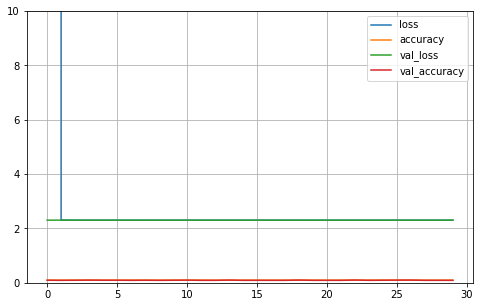

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 10) # set the vertical range to [0-1]
plt.show()

In [ ]:
model.evaluate(X_test, y_test)


313/313 [==============================] - 0s 1ms/step - loss: 2.3032 - accuracy: 0.1000


[2.3031702041625977, 0.10000000149011612]

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
class CustomImpKeras(keras.Model):
  # intializing all keras architecture layers including hidden layers and output layer
  def __init__(self,unit=30,units= [],number_hidden_layers=None , activations="relu",**kwargs):
    super().__init__(**kwargs)    #handle standard arguments for keras
    if number_hidden_layers:
      pass
    if units:
      pass
    self.hidden1 = keras.layers.Dense(units=unit, activation=activations)
    self.hidden2 = keras.layers.Dense(units=unit, activation=activations)
    self.main_output = keras.layers.Dense(1)
    self.aux_output = keras.layers.Dense(1)
  
  def call(self,inputs):
    inputA,inputB = inputs
    hidden1 = self.hidden1(inputB)
    hidden2 = self.hidden2(hidden1)
    concat = keras.layers.Concatenate()([inputA,hidden2])
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)
    return main_output,aux_output
model = CustomImpKeras()
input_A = keras.layers.Input(shape=[4], name="wide_input")
input_B = keras.layers.Input(shape=[4], name="deep_input")

model = model.call((input_A,input_B))


In [ ]:
X_train.shape,y_train.shape
X_train_A, X_train_B = X_train[:, :4], X_train[:, 4:]
X_valid_A, X_valid_B = X_valid[:, :4], X_valid[:, 4:]
X_test_A, X_test_B = X_test[:, :4], X_test[:, 4:]


In [ ]:
output,aux_layer = model
model = keras.Model(inputs=[input_A, input_B], outputs=[output,aux_layer])
model.compile(loss=["mse","mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-4))

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 4.2511 - dense_5_loss: 4.0533 - dense_6_loss: 6.0305 - val_loss: 3.5096 - val_dense_5_loss: 3.2509 - val_dense_6_loss: 5.8384
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 3.4560 - dense_5_loss: 3.1805 - dense_6_loss: 5.9358 - val_loss: 2.8060 - val_dense_5_loss: 2.4870 - val_dense_6_loss: 5.6761
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 2.8320 - dense_5_loss: 2.5089 - dense_6_loss: 5.7395 - val_loss: 2.3091 - val_dense_5_loss: 1.9568 - val_dense_6_loss: 5.4802
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 2.3715 - dense_5_loss: 2.0128 - dense_6_loss: 5.5998 - val_loss: 1.9700 - val_dense_5_loss: 1.6048 - val_dense_6_loss: 5.2572
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 1.9760 - dense_5_loss: 1.6055 - dense_6_loss: 5.3105 - val_loss: 1.7443 - val_dense_5_loss: 1.3800 - val_dense_6_loss: 5.0231


In [ ]:
mse_test
# saving keras model in HDF5 format
model.save("my_keras_model.h5")
# Loading keras model 
model = keras.models.load_model("my_keras_model.h5")


In [ ]:
# saving check point of keras model trainig but only if model has goood performance for validation data 
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
                                                save_best_only=True)
# model with callbacks is checkpoint --saving model
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

model = keras.models.load_model("my_keras_model.h5") # roll back to best model

In [ ]:
# early stoping model in case constant learning 
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

# impleamention for cutome Callback 
# keras.callbacks
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [ ]:
import os
root_logdir = os.path.join("/content/", "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_06_07-15_15_22'

In [ ]:
[...] # Build and compile your model
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])


Keras Tuner
An easy-to-use hyperparameter optimization library by Google for Keras models, with a hosted service for visualization and analysis.

In [ ]:
# %load_ext tensorboard
# %tensorboard --logdir=./my_logs --port=6006
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100 # some random data
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3) # random 32×32 RGB images
        tf.summary.image("my_images", images * step / 1000, step=step)
        texts = ["The step is " + str(step), "Its square is " + str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

# Exercises

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns
from sklearn.linear_model import Perceptron
from sklearn import datasets
import tensorflow as tf
from tensorflow import keras
print(keras.__version__), print(tf.__version__)

In [ ]:
mnist = keras.datasets.mnist.load_data()


In [ ]:
(X_train,y_train),(X_test,y_test) = mnist
X_valid,y_valid = X_train[-5000:],y_train[-5000:]
X_train,y_train = X_train[:-5000],y_train[:-5000]
X_train.shape

In [ ]:
X_train.shape,X_valid.shape


In [ ]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()

mean = (X_train).mean(); std_dev = X_train.std()
(X_train-mean)/std_dev


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(50,activation="sigmoid"))
# model.add(keras.layers.Dense(50,activation="sigmoid"))
model.add(keras.layers.Dense(25,"sigmoid"))
model.add(keras.layers.Dense(10,"softmax"))


In [ ]:
X_train.shape,y_valid.shape,y_train.shape,X_valid.shape

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(50,activation="relu"))
# model.add(keras.layers.Dense(50,activation="sigmoid"))
model.add(keras.layers.Dense(15,"relu"))
model.add(keras.layers.Dense(10,"softmax"))

model.compile("SGD","mean_squared_error","MeanSquaredError")

model.fit(X_train,y_train,epochs=40,validation_data=(X_valid,y_valid))

mse = model.evaluate(X_test,y_test,batch_size=200)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(200,activation="relu"))
model.add(keras.layers.Dense(200,activation="sigmoid"))
model.add(keras.layers.Dense(40,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

# model.compile(optimizer="SGD",loss="mse",metrics="MeanSquaredError")
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_valid, y_valid),
                    callbacks=[ early_stopping_cb])


In [ ]:
dir(keras.metrics)
mse = model.evaluate(X_test,y_test,batch_size=200)
mse

# Training Neural Network ( Theory part )


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns
from sklearn.linear_model import Perceptron
from sklearn import datasets
import tensorflow as tf
from tensorflow import keras
from math import exp

print(keras.__version__), print(tf.__version__)

2.4.0
2.4.1


(None, None)


# Gradient vaninshing problem and some solutions for it

Unfortunately, gradients often get smaller and smaller as the algorithm progresses down to the lower layers. As a result, the Gradient Descent update leaves the lower layers’ connection weights virtually unchanged, and training never converges to a good solution. We call this the vanishing gradients problem.It is also true for bigger gradients.

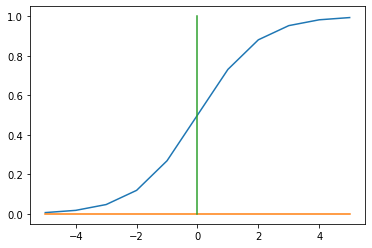

In [ ]:
arr, i = [], 0.0
for x in range(-5, 6, 1):
  sigmoid_function = 1 /(1+exp(-x))
  arr.append(sigmoid_function)
plt.plot([x for x in range(-5,6)],arr)
plt.plot([x for x in range(-5,6)], [0]*11)
plt.plot([0]*6, [0.0, 0.2, 0.4, 0.6, 0.8,1.0])


Gradient activation function sometimes not work, for example, when variance increases from  input layer to output layer , in big data it is significient change and effect the model accuracy, it is due to variance is directly proportional to number of neurons and layers. 
To handle this problem we uses different activation function intialization that help in mainting variance betweeen layers.

*    

```
 Initialization	Activation functions	                  σ² (Normal)   
* Glorot          None, tanh, logistic, softmax            1 / fan_avg

* He              ReLU and variants                        2 / fan_in

* LeCun           SELU                                     1 / fan_in

```

           








where fan_avg are input layer variance average and 

In [ ]:
# Activation 
he_avg_init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                                 distribution='uniform')
keras.layers.Dense(10, activation="sigmoid", kernel_initializer=he_avg_init)

matrix = kernal

To increase effficeincy of algorithm, activation functions 

> SELU > ELU > leaky ReLU (and its variants) > ReLU > tanh > logistic

where ReLU is fastest and most libraries have default it.

LeakyReLUα(z) = max(αz, z) (see Figure 11-2). The hyperparameter α defines how much the function “leaks”: it is the slope of the function for z < 0 and is typically set to 0.01. 




In [ ]:
model = keras.models.Sequential([
    [...]
    keras.layers.Dense(10, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(alpha=0.2),
    [...]
])

# model with activation function selu 
layer = keras.layers.Dense(10, activation="selu",
                           kernel_initializer="lecun_normal")


In [ ]:
(X_train,y_train),(X_test,y_test) = keras.datasets.fashion_mnist.load_data()
X_train.shape
X_valid,y_valid = X_train[-5000:],y_train[-5000:]
X_train,y_train = X_train[:-5000],y_train[:-5000]
X_valid.shape,y_valid.shape

((5000, 28, 28), (5000,))

we are facing problem of vanishing/exploding gradients problems and we do better or try to minmize it by choosing leaky relu activation function or more (selu) efficient activation functions. BatchNormalization is layer which normalize each layer ouput, so it don't converge and 

In [ ]:

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer="SGD",loss="mean_squared_error",metrics="mean_squared_error")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

In [ ]:
model.fit(X_train,y_train,epochs=50,validation_data=(X_valid,y_valid),callbacks=[early_stopping_cb])
mse = model.evaluate(X_test,y_test)

In [ ]:
dir(keras.losses)
y_pred = model.predict(X_train[:28])
X_train[:28].shape,y_train[:28].shape,y_pred.shape
y_train[:28]
np.max(y_pred,axis=1)
y_pred = model.predict(X_train)


In [ ]:
model.summary()


In [ ]:
a,b,c,d = (model.layers[1].variables)
[(var.name, var.trainable) for var in model.layers[1].variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [ ]:
# used for regression consists only 1 output neuron

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dense(1, activation="softmax")
])

model.compile(optimizer="SGD",loss="mean_squared_error",metrics="mean_squared_error")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

In [ ]:
model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid),callbacks=[early_stopping_cb])
mse = model.evaluate(X_test,y_test)

In [ ]:
# regression keras deep neural network model

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
                                 
    keras.layers.Dense(300, activation="sigmoid"),
    keras.layers.Dense(100, activation="sigmoid"),

    keras.layers.Dense(100, activation="sigmoid"),
    keras.layers.Dense(10)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)
mse_test

In [ ]:
y_pred = model.predict(X_train[:1])
plt.imshow(X_train[0],cmap=mpl.cm.binary)


In [ ]:
# another strategy for solving vanishing/exploding gradients is to set clip value which is basiclly setting threshold for grdients
# so it is limited by some limit parameters.
# keras implementation

optimizer = keras.optimizers.SGD(clipvalue=1.0)
model.compile(loss="mse", optimizer=optimizer)

Momentum optimizers, it is like rolling of ball from upper part with high velocity due to gravity and it is momentum minus previous gradients multiply by learning rate (all are vector) 

In [ ]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)


In [ ]:
# Nesterov Accelerated Gradient
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

# Ada Grad 
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)
# where rho is Beta = 0.9


When you save a model, the optimizer and its learning rate get saved along with it. This means that with this new schedule function, you could just load a trained model and continue training where it left off, no problem. Things are not so simple if your schedule function uses the epoch argument, however: the epoch does not get saved, and it gets reset to 0 every time you call the fit() method. If you were to continue training a model where it left off, this could lead to a very large learning rate, which would likely damage your model’s weights. One solution is to manually set the fit() method’s initial_epoch argument so the epoch starts at the right value.

In [ ]:
# Dropout is regularizing technique in which we freeze or stop some neurons input or like ingore them, it is randomly choose 
# which neurons to stop or continue
# it is very powerfull and make our model more gerneralized or could increses accuracy of test set.
# If model overfit then increasing, increasing dropout rate may help or vice-versa.


model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
words = ["xbc","pcxbcf","xb","cxbc","pcxbc"]
sorted(words)
"xbc" in "xb":


False

## Exercises

In [ ]:
(X_train,y_train),(X_test,y_test) = keras.datasets.cifar10.load_data()
X_train.shape,X_test.shape
X_valid,y_valid = X_train[-5000:],y_train[-5000:]
X_train,y_train = X_train[:-5000],y_train[:-5000]
X_valid.shape,y_valid.shape

170500096/170498071 [==============================] - 11s 0us/step


((5000, 32, 32, 3), (5000, 1))

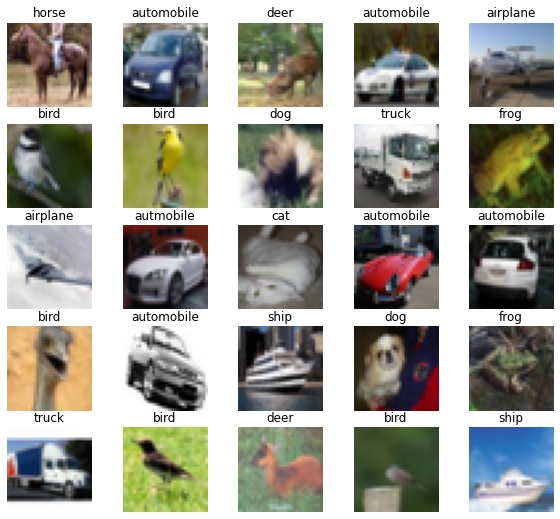

In [ ]:
j,k,lables=0,0, ["horse","automobile","deer","automobile","airplane","bird","bird","dog","truck",
                 "frog","airplane","autmobile","cat","automobile","automobile","bird","automobile","ship","dog",
                 "frog","truck","bird","deer","bird","ship"]
fig1,ax = plt.subplots(5,5,figsize=(10,9))
while j<5:
  for i in range(5):
    ax[j][i].imshow(X_valid[k])
    ax[j][i].axis("off")
    ax[j][i].set_title(label=lables[k])
    k+=1
  j+=1

fig1.savefig("lable_by_sourabh_images")

In [ ]:
'''
airplane										
automobile										
bird										
cat										
deer										
dog										
frog										
horse										
ship										
truck
'''
class_names = np.array(["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"])



In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32,3]))
for i in range(20):
  model.add(keras.layers.Dense(100,activation="elu",kernel_initializer="he_normal"))

model.add(keras.layers.Dense(10,activation="softmax"))




In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)


model.compile(optimizer = keras.optimizers.Nadam(),loss="sparse_categorical_crossentropy",metrics="mse")

model.fit(X_train,y_train,epochs=50,callbacks=[early_stopping_cb],validation_data=(X_valid,y_valid))

score = model.evaluate(X_test,y_test)
print(score)



In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)


model.compile(optimizer="Nadam",loss="sparse_categorical_crossentropy",metrics="mse")

model.fit(X_train,y_train,epochs=50,callbacks=[early_stopping_cb],validation_data=(X_valid,y_valid))

score = model.evaluate(X_test,y_test)
print(score)

In [ ]:
model.save("drive/MyDrive/models/model.hd5")


INFO:tensorflow:Assets written to: drive/MyDrive/models/model.hd5/assets


In [ ]:
# saving model for future use or any other purpose 


# idx_list = class_names()
# model.predict_classes()
num_classes = np.argmax(model.predict(X_valid[:25]), axis=-1)
class_names[num_classes]

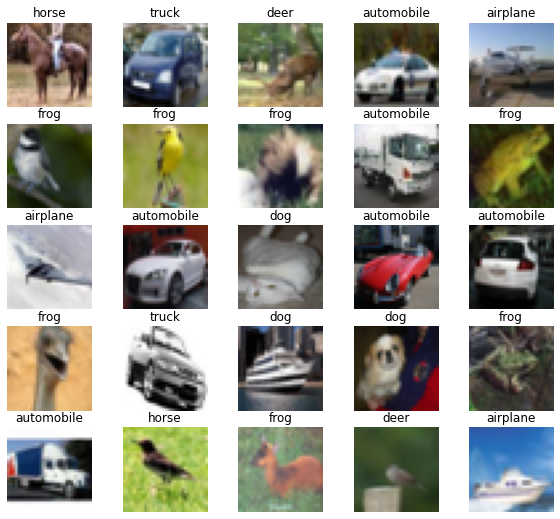

In [ ]:
j,k=0,0
fig,ax = plt.subplots(5,5,figsize=(10,9))
while j<5:
  for i in range(5):
    ax[j][i].imshow(X_valid[k])
    ax[j][i].axis("off")
    ax[j][i].set_title(label=idx_list[k])
    k+=1
  j+=1

fig.savefig("label_by_machine_images")

In [ ]:
dir(model.layers[0])

y_pred = class_names[np.argmax(model.predict(X_valid), axis=-1)]
y_true = class_names[y_valid]
y_pred.shape,y_true.shape
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_true,y_pred,labels=class_names)
# plt.bar(class_names,height= mat[0])

# ax = plt.bar(class_names,height=mat[0] )

# for bar in ax.patches:
#     bar.set_facecolor('black')

# # highlight = 'D'
# # pos = df.index.get_loc(highlight)

# ax.patches[0].set_facecolor('green')


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np

np.random.seed(19680801)
Z = np.random.rand(6, 10)
x = np.arange(-0.5, 10, 1)  # len = 11
y = np.arange(4.5, 11, 1)  # len = 7
x = class_names
y = mat
fig, ax = plt.subplots()
ax.pcolormesh(x, y, Z,cmap=mpl.cm.binary)

In [ ]:
def colormap(lst):

    # intensity = np.array(lst)

    x, y = lst.shape

    x1 = range(0, x)
    y1 = range(0, y)

    x2,y2 = np.meshgrid(x1,y1)

    # print (x2,y2)

    # print (lst.shape)
    fig,ax = plt.subplots(1,1,figsize=(15,10))
    plt.pcolormesh(class_names,y2,lst,cmap=mpl.cm.binary)
    plt.colorbar()
    fig.savefig('drive/MyDrive/colormap.pdf', dpi = 1200)
    
    
    plt.show()

colormap(mat)

In [ ]:
# Batch normalization 

model = keras.Sequential()
    
model.add(keras.layers.Flatten(input_shape=[32,32,3]))
for _ in range(20):
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))

model.add(keras.layers.Dense(10,activation="softmax"))

42

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

model.compile(optimizer="Nadam",loss="sparse_categorical_crossentropy",metrics="mse")

model.fit(X_train,y_train,epochs=50,callbacks=[early_stopping_cb],validation_data=(X_valid,y_valid))


In [ ]:
score = model.evaluate(X_test,y_test)



In [ ]:
# loading previous trained model

filepath = "/content/drive/MyDrive/models/model.hd5"
model = tf.keras.models.load_model(
    filepath, custom_objects=None, compile=True, options=None
)

In [ ]:
# model.predict_classes(X_valid[:25])
idx_list = class_names[np.argmax(model.predict(X_valid[:25]),axis=-1)]
j,k=0,0
fig,ax = plt.subplots(5,5,figsize=(10,9))
while j<5:
  for i in range(5):
    ax[j][i].imshow(X_valid[k])
    ax[j][i].axis("off")
    ax[j][i].set_title(label=idx_list[k])
    k+=1
  j+=1

fig.savefig("label_by_machine_images")
model.evaluate(X_test,y_test)

In [ ]:
model_a = keras.models.clone_model(model)
model_a.set_weights(model.get_weights())


In [ ]:
new_model = keras.Sequential()

new_model.add(keras.layers.Flatten(input_shape= [32,32,3]))
for i in range(15):
  new_model.add(model_a.layers[i])
  new_model.layers[i].trainable = False

for _ in range(5):

  new_model.add(keras.layers.Dense(100,activation="elu",kernel_initializer="he_normal"))
  keras.layers.Dropout(rate=0.2)


new_model.add(keras.layers.Dense(10,activation="softmax"))

new_model.compile(optimizer="Nadam",loss="sparse_categorical_crossentropy",metrics="mse")

# early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
#                                                   restore_best_weights=True)

new_model.fit(X_train,y_train,epochs=5,validation_data=(X_valid,y_valid))



Epoch 1/5
1407/1407 [==============================] - 12s 7ms/step - loss: 2.4601 - mse: 27.5058 - val_loss: 1.7628 - val_mse: 28.0684
Epoch 2/5
1407/1407 [==============================] - 10s 7ms/step - loss: 1.7070 - mse: 27.5538 - val_loss: 1.7361 - val_mse: 28.0687
Epoch 3/5
1407/1407 [==============================] - 10s 7ms/step - loss: 1.6964 - mse: 27.5758 - val_loss: 1.7446 - val_mse: 28.0692
Epoch 4/5
1407/1407 [==============================] - 10s 7ms/step - loss: 1.6957 - mse: 27.5436 - val_loss: 1.7600 - val_mse: 28.0674
Epoch 5/5
1407/1407 [==============================] - 10s 7ms/step - loss: 1.7046 - mse: 27.6195 - val_loss: 1.7276 - val_mse: 28.0669


In [ ]:
for i in range(15):
  new_model.layers[i].trainable=True
new_model.compile(loss="sparse_categorical_crossentropy",metrics="mse",optimizer="Nadam")

# early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
#                                                   restore_best_weights=True)

new_model.fit(X_train,y_train,epochs=40,validation_data=(X_valid,y_valid))
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)


In [ ]:
new_model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.7491 - mse: 27.6256


# Model Tuning 

In [ ]:
# required all possible library
# 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns
from sklearn.linear_model import Perceptron
from sklearn import datasets
import tensorflow as tf
from tensorflow import keras
from math import exp
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from  sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,confusion_matrix

print(keras.__version__), print(tf.__version__)

2.4.0
2.4.1


(None, None)

In [ ]:
(X_train,y_train),(X_test,y_test) = keras.datasets.fashion_mnist.load_data()
X_train.shape
X_valid,y_valid = X_train[-5000:],y_train[-5000:]
X_train,y_train = X_train[:-5000],y_train[:-5000]
X_train.shape,y_valid.shape,X_valid.shape

In [ ]:

def reshape_array_to2d():
    t = tf.reshape(X_train,shape=(55000,784))
    t2 = tf.reshape(X_valid,shape=(5000,784))
    t3 = tf.reshape(X_test,shape=(10000,784))
    return t,t2,t3
t,t2,t3 = reshape_array_to2d()
X_train = t.numpy()
X_test  = t3.numpy()
X_valid = t2.numpy()

y_valid.shape,y_train.shape,X_valid.shape,X_test.shape


((5000,), (55000,), (5000, 784), (10000, 784))

In [ ]:


rand_clf = RandomForestClassifier(n_estimators=1000,max_depth=4,max_features=28,criterion="gini")
# scl = StandardScaler()
svm_clf = SVC()
tree_clf = DecisionTreeClassifier(criterion="entropy")

# mean = X_train.mean(); st = X_train.std()


rand_clf.fit(X_train,y_train)
svm_clf.fit(X_train,y_train)
tree_clf.fit(X_train,y_train)
s1 = svm_clf.score(X_test,y_test); s2 = tree_clf.score(X_test,y_test) ; s3 = rand_clf.score(X_test,y_test)
# normalization of input is not mush increases accuracy of test data , so it not help much
print("SVM Clf score: ", s1)
print("Tree Clf score: ", s2)
print("Random Forest Clf score: ", s3)


In [ ]:
print("SVM Clf score: ", s1)
print("Tree Clf score: ", s2)
print("Random Forest Clf score: ", s3)

SVM Clf score:  0.8805
Tree Clf score:  0.7974
Random Forest Clf score:  0.741


In [ ]:
y_pred_svm = svm_clf.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)
y_pred_rand = rand_clf.predict(X_test)

mat = confusion_matrix(y_test,y_pred_svm)

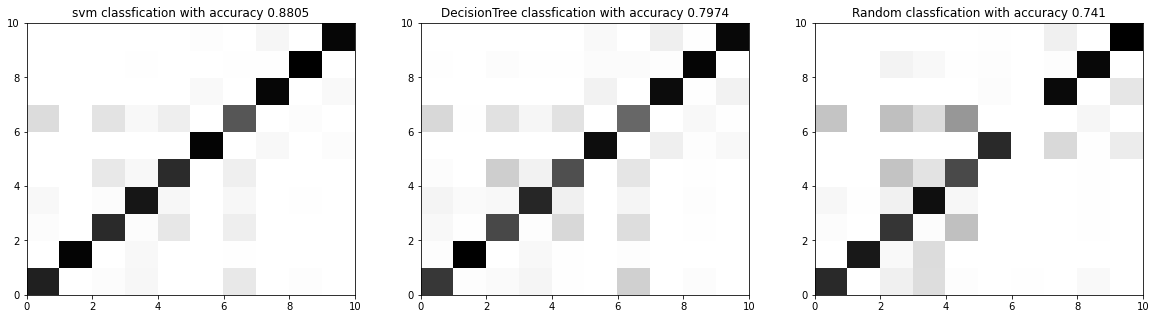

In [ ]:
mat2 = confusion_matrix(y_test,y_pred_tree)
mat3 = confusion_matrix(y_test,y_pred_rand)

fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].pcolormesh(mat,cmap=mpl.cm.binary)
ax[1].pcolormesh(mat2,cmap=mpl.cm.binary)
ax[2].pcolormesh(mat3,cmap=mpl.cm.binary)
ax[0].set_title("svm classfication with accuracy "+str(s1))
ax[1].set_title("DecisionTree classfication with accuracy "+str(s2))
ax[2].set_title("Random classfication with accuracy "+str(s3))
fig.savefig("drive/MyDrive/three algo class")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier,GradientBoostingClassifier
clf1 = SVC(probability=True)
clf2 = DecisionTreeClassifier(criterion="entropy")
clf3 = GaussianNB()

# eclf1 = VotingClassifier(estimators=[
#         ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
# eclf1 = eclf1.fit(X_train, y_train)
# eclf_score1 = eclf1.score(X_test,y_test)


# eclf2 = VotingClassifier(estimators=[
#         ('lr', clf1), ('rf', clf2), ('gnb', clf3)],
#         voting='soft')
# eclf2 = eclf2.fit(X_train, y_train)


eclf3 = VotingClassifier(estimators=[
       ('lr', clf1), ('rf', clf2), ('gnb', clf3)],
       voting='soft', weights=[2,1,1],
       flatten_transform=True)
eclf3 = eclf3.fit(X_train, y_train)
# eclf_score2 = eclf2.score(X_test,y_test)

eclf_score3 = eclf3.score(X_test,y_test)
# print("hard margin voting clssifier",eclf_score1)
# print("soft margin voting clssifier",eclf_score2)

print("soft with random intializer weights margin voting clssifier",eclf_score3)


In [ ]:
# simple tensor creations
# for i in tf.data.Dataset.range(5):
#     print(i)



In [ ]:
with tf.io.TFRecordWriter("/content/mydata.tfrecord") as f:
    f.write(b"this is binary data and")
    f.write(b"this is stored in tfrecord")

df = tf.data.TFRecordDataset(["mydata.tfrecord"])
df

<TFRecordDatasetV2 shapes: (), types: tf.string>

Google's own protocol (protobuf) for binary data and here we can use them with help of tesorflow and created instances for our csv data, it is much more efficient for large data.
for parsing and reading it required defining some sort of schema like to define format of stored binary data. 
learn more about it from tensorflow.

The fixed-length features are parsed as regular tensors, but the variable-length features are parsed as sparse tensors. You can convert a sparse tensor to a dense tensor using tf.sparse.to_dense(), but in this case it is simpler to just access its values:

In [ ]:
from tensorflow.train import BytesList, FloatList, Int64List
from tensorflow.train import Feature, Features, Example

# It is google's own 
person_example = Example(
    features=Features(
        feature={
            "name": Feature(bytes_list=BytesList(value=[b"Alice"])),
            "id": Feature(int64_list=Int64List(value=[123])),
            "emails": Feature(bytes_list=BytesList(value=[b"a@b.com",
                                                          b"c@d.com"]))
        }))

with tf.io.TFRecordWriter("/content/mydata.tfrecord") as f:
    f.write(person_example.SerializeToString())

df = tf.data.TFRecordDataset(["mydata.tfrecord"])
feature_description = {
    "name": tf.io.FixedLenFeature([], tf.string, default_value=""),
    "id": tf.io.FixedLenFeature([], tf.int64, default_value=0),
    "emails": tf.io.VarLenFeature(tf.string),
}

for serialized_example in tf.data.TFRecordDataset(["mydata.tfrecord"]):
    parsed_example = tf.io.parse_single_example(serialized_example,
                                                feature_description)


`SequentialExample protobuf`

message FeatureList { repeated Feature feature = 1; };
message FeatureLists { map<string, FeatureList> feature_list = 1; };
message SequenceExample {
    Features context = 1;
    FeatureLists feature_lists = 2;
};

`tf.io.parse_single_sequence_example()` to parse a single SequenceExample or `tf.io.parse_sequence_example()` to parse a batch. Both functions return a tuple containing the context features (as a dictionary) and the feature lists (also as a dictionary). If the feature lists contain sequences of varying sizes (as in the preceding example), you may want to convert them to ragged tensors, using `tf.RaggedTensor.from_sparse()` (see the notebook for the full code):

In [ ]:
# standradizing layer used for normalizing or we can use it for some other use cases also 
means = np.mean(X_train, axis=0, keepdims=True)
stds = np.std(X_train, axis=0, keepdims=True)
eps = keras.backend.epsilon()


model = keras.models.Sequential([
    keras.layers.Lambda(lambda inputs: (inputs - means) / (stds + eps)),   # adding eps only for to ignore zerodivide error
    [...] # other layers
])


# More genral and clean form 

class Standardization(keras.layers.Layer):
    def adapt(self, data_sample):
        self.means_ = np.mean(data_sample, axis=0, keepdims=True)
        self.stds_ = np.std(data_sample, axis=0, keepdims=True)
    def call(self, inputs):
        return (inputs - self.means_) / (self.stds_ + keras.backend.epsilon())
# apply 
std_scaler = Standardization()
std_scaler.adapt(X_train)

In [ ]:
x = (std_scaler.call(X_train))
# keras implementaion for layer like std_scaler or it will be more efficient 
keras.layers.LayerNormalization()

In [ ]:
(X_train,y_train),(X_test,y_test)  =keras.datasets.imdb.load_data()

In [ ]:
# keras.layers.experimental.preprocessing.TextVectorization(X_train[0])


In [ ]:
#  a layer for word enbedding after vectorizing word from TextVectorization and it is really awesome layer and look more about it
keras.layers.Embedding()

Check this https://github.com/keras-team/governance/blob/master/rfcs/20190502-preprocessing-layers.md

In [ ]:
from sklearn.model_selection import train_test_split
(X_train,y_train),(X_test,y_test)  =keras.datasets.mnist.load_data()
mnist_train,mnist_tets = (X_train,y_train),(X_test,y_test) 

X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size=0.1,train_size=0.90)

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape,X_valid.shape,y_train.shape,y_valid.shape


((54000, 28, 28), (6000, 28, 28), (54000,), (6000,))

In [ ]:
# mnist_train = mnist_train.shuffle(10000).batch(54)
# mnist_train = mnist_train.shuffle(10000)
t = tf.data.Dataset.from_tensors(X_train)
d = t.shuffle(10000).batch(54)

In [ ]:
# train data shuffling and creating 540 bathces, we will store every batch as protobuf protocol example 
dataset_train_image = tf.data.Dataset.from_tensor_slices(X_train)
dataset_train_image = dataset_train_image.shuffle(540).batch(100)
dataset_train_lable = tf.data.Dataset.from_tensor_slices(y_train)
dataset_train_lable = dataset_train_lable.shuffle(540).batch(100)

# validation data shuffling and batch
dataset_valid_image = tf.data.Dataset.from_tensor_slices(X_valid)
dataset_valid_image = dataset_valid_image.shuffle(540).batch(100)
dataset_valid_lable = tf.data.Dataset.from_tensor_slices(y_valid)
dataset_valid_lable = dataset_valid_lable.shuffle(540).batch(100)



In [ ]:

data_train = (list(dataset_train_image.as_numpy_iterator()))
lable_train = list(dataset_train_lable.as_numpy_iterator())

data_valid = (list(dataset_valid_image.as_numpy_iterator()))
lable_valid = list(dataset_valid_lable.as_numpy_iterator())



message FeatureList { repeated Feature feature = 1; };
message FeatureLists { map<string, FeatureList> feature_list = 1; };
message SequenceExample {
    Features context = 1;
    FeatureLists feature_lists = 2;
};

parsed_context, parsed_feature_lists = tf.io.parse_single_sequence_example(
    serialized_sequence_example, context_feature_descriptions,
    sequence_feature_descriptions)
parsed_content = tf.RaggedTensor.from_sparse(parsed_feature_lists["content"])


In [ ]:

from tensorflow.train import BytesList, FloatList, Int64List
from tensorflow.train import Feature, Features, Example


# "name": Feature(bytes_list=BytesList(value=[b"Alice"])),
# "id": Feature(int64_list=Int64List(value=[123])),
# "emails": Feature(bytes_list=BytesList(value=[b"a@b.com",
#                                                           b"c@d.com"]))
# for i in data:

# person_example = Example(
#     features=Features(
#         feature={
#             "features": Feature(bytes_list=BytesList(value=[data_train_ser.numpy()])),
#             "lables": Feature(int64_list=Int64List(value=lable_train[0]))                                                          
#         }))

# # parsing in batches
# # dataset = tf.data.TFRecordDataset(["my_contacts.tfrecord"]).batch(10)
# with tf.io.TFRecordWriter("/content/drive/MyDrive/mydata{k1}.tfrecord".format(k1=1)) as f:
#     f.write(person_example.SerializeToString())



In [ ]:
"/content/drive/Mydrive/df/mydata{k1}.tfrecord".format(k1=1)

'/content/drive/Mydrive/df/mydata1.tfrecord'

In [ ]:
for i in range(540):
    data_train_ser = tf.io.serialize_tensor(data_train[i])
    person_example = Example(
    features=Features(
        feature={
            "features": Feature(bytes_list=BytesList(value=[data_train_ser.numpy()])),
            "lables": Feature(int64_list=Int64List(value=lable_train[i]))                                                          
        }))
    with tf.io.TFRecordWriter("/content/drive/MyDrive/mydata{k1}.tfrecord".format(k1=i)) as f:
        f.write(person_example.SerializeToString())
    


    

In [ ]:
file_pattern =["/content/drive/MyDrive/mydata1.tfrecord","/content/drive/MyDrive/mydata2.tfrecord"]
file_pattern = "/content/drive/MyDrive/mydata*.tfrecord"
filepath_dataset = tf.data.Dataset.list_files(file_pattern, seed=42)


In [ ]:
# ***
# it is not working, i don't know why and I also don't know if it works 
# ***


# feature_description = {
#     "features": tf.io.FixedLenFeature([], tf.int64, default_value=0),
#     "lables": tf.io.FixedLenFeature([], tf.int64, default_value=0),
# }

# for serialized_examples in filepath_dataset:
#     parsed_examples = tf.io.parse_example(serialized_examples,
#                                           feature_description)

In [ ]:
dataset = tf.data.TFRecordDataset(filenames = filepath_dataset)

<dtype: 'string'>
<dtype: 'string'>


In [ ]:
raw_example = next(iter(dataset))
parsed = tf.train.Example.FromString(raw_example.numpy())

lable,feature = parsed.features.feature['lables'],parsed.features.feature['features'] 

In [ ]:
feature_description = {
    "features": tf.io.VarLenFeature(tf.string),
    "lables": tf.io.VarLenFeature(tf.int64),
}

for serialized_example in tf.data.TFRecordDataset(["/content/drive/MyDrive/mydata1.tfrecord"]):
    parsed_example = tf.io.parse_single_example(serialized_example,
                                                feature_description)

In [ ]:
f =parsed_example['features']
t = tf.sparse.to_dense(parsed_example["features"], default_value=b"")
parsed_example["lables"].values,
parsed_example["features"].values

<tf.Tensor: shape=(1,), dtype=string, numpy=
array([b'\x08\x04\x12\x0c\x12\x02\x08d\x12\x02\x08\x1c\x12\x02\x08\x1c"\xc0\xe4\x04\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\xaa\xa9\xe9\xfd\x8b=\x0b\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x18\xfc\xfc\xfc\xfc\xfd\xec\xcb2\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x18\xfc\xfc\xfc\xfc\xfd\xfc\xfc\xe3\x11\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x18\xfc\x99--u\xfc\xfc\xfcA\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\r\x89%\x00\x00\x03u\xfc\xfc\xbd\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [ ]:
def decode_fn(record_bytes):
  return tf.io.parse_single_example(
      # Data
      record_bytes,

      # Schema
      {"features": tf.io.VarLenFeature([], dtype=tf.int32),
       "lables": tf.io.VarLenFeature([], dtype=tf.int32)}
  )


To plot model graph representation 



```
keras.utils.plot_model(model, "model_graph.png", show_shapes=True)

```

